In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df = pd.read_csv('marketing_campaign_data_lengkap.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.sample(5)

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Registration_Year,Umur_Saat_Registrasi,klasifikasi_umur,Conversion_Rate,Jumlah_Anak,Total_Pembelian,Total_Campaign,Total_Pengeluaran
1067,1218,1218,4500,1991,S3,Bertunangan,68682000.0,0,0,06-10-2013,56,919000,0,505000,99000,30000,45000,1,4,9,10,2,0,0,0,0,0,0,3,11,0,2013,22,Remaja,0.000,0,24,0,1598000
1341,1536,1536,451,1989,S1,Lajang,9255000.0,1,0,20-12-2013,91,9000,0,7000,2000,0,4000,1,1,1,2,8,0,0,0,0,0,0,3,11,0,2013,24,Remaja,0.000,1,5,0,22000
1013,1158,1158,7959,1961,S1,Menikah,79410000.0,0,0,29-05-2014,19,658000,80000,483000,123000,13000,13000,1,3,2,5,1,0,0,0,0,0,0,3,11,0,2014,53,Lansia,0.000,0,11,0,1370000
1897,2175,2175,1772,1975,S3,Menikah,79174000.0,0,0,11-01-2013,2,1074000,37000,518000,193000,92000,129000,1,5,6,7,2,0,0,1,1,0,0,3,11,1,2013,38,Dewasa,0.500,0,19,2,2043000
1507,1724,1724,1381,1982,S3,Lajang,38513000.0,1,0,28-01-2014,20,172000,3000,115000,16000,0,18000,5,6,1,5,8,0,0,0,0,0,0,3,11,1,2014,32,Dewasa,0.125,1,17,0,324000


In [6]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], axis=1, inplace=True)

In [7]:
df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [8]:
df.sample(5)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Registration_Year,Umur_Saat_Registrasi,klasifikasi_umur,Conversion_Rate,Jumlah_Anak,Total_Pembelian,Total_Campaign,Total_Pengeluaran
1347,S3,Lajang,51411000.0,81,5,0,0,2013,60,Lansia,0.0,3,4,0,18000
1573,S1,Bertunangan,34074000.0,69,6,0,0,2013,61,Lansia,0.0,2,14,1,255000
644,S1,Menikah,72025000.0,46,2,0,1,2014,65,Lansia,0.5,0,26,3,1677000
387,S1,Lajang,57959000.0,71,3,0,0,2013,58,Lansia,0.0,1,27,0,868000
987,SMA,Lajang,16581000.0,51,4,0,0,2013,28,Dewasa,0.0,0,4,0,24000


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# Label Encoding menggunakan scikit-learn
label_encoder = LabelEncoder()

df['Education_encode'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status_encode'] = label_encoder.fit_transform(df['Marital_Status'])
df['klasifikasi_umur_encode'] = label_encoder.fit_transform(df['klasifikasi_umur'])

In [11]:
df.drop(['Education', 'Marital_Status', 'klasifikasi_umur'], axis=1, inplace=True)

In [12]:
df.sample(5)

,Income,Recency,NumWebVisitsMonth,Complain,Response,Registration_Year,Umur_Saat_Registrasi,Conversion_Rate,Jumlah_Anak,Total_Pembelian,Total_Campaign,Total_Pengeluaran,Education_encode,Marital_Status_encode,klasifikasi_umur_encode
303,65073000.0,65,2,1,0,2013,70,0.000000,0,14,0,900000,2,5,1
1312,53374000.0,34,9,0,1,2012,43,0.111111,1,21,1,1064000,3,0,0
1354,57530000.0,68,1,0,0,2013,62,0.000000,1,7,0,92000,2,1,1
983,46734000.0,40,7,0,0,2012,58,0.000000,1,14,0,330000,1,5,1
110,62981000.0,21,3,0,0,2013,46,0.000000,0,23,1,1482000,3,0,1


### HEATMAP

<Axes: >

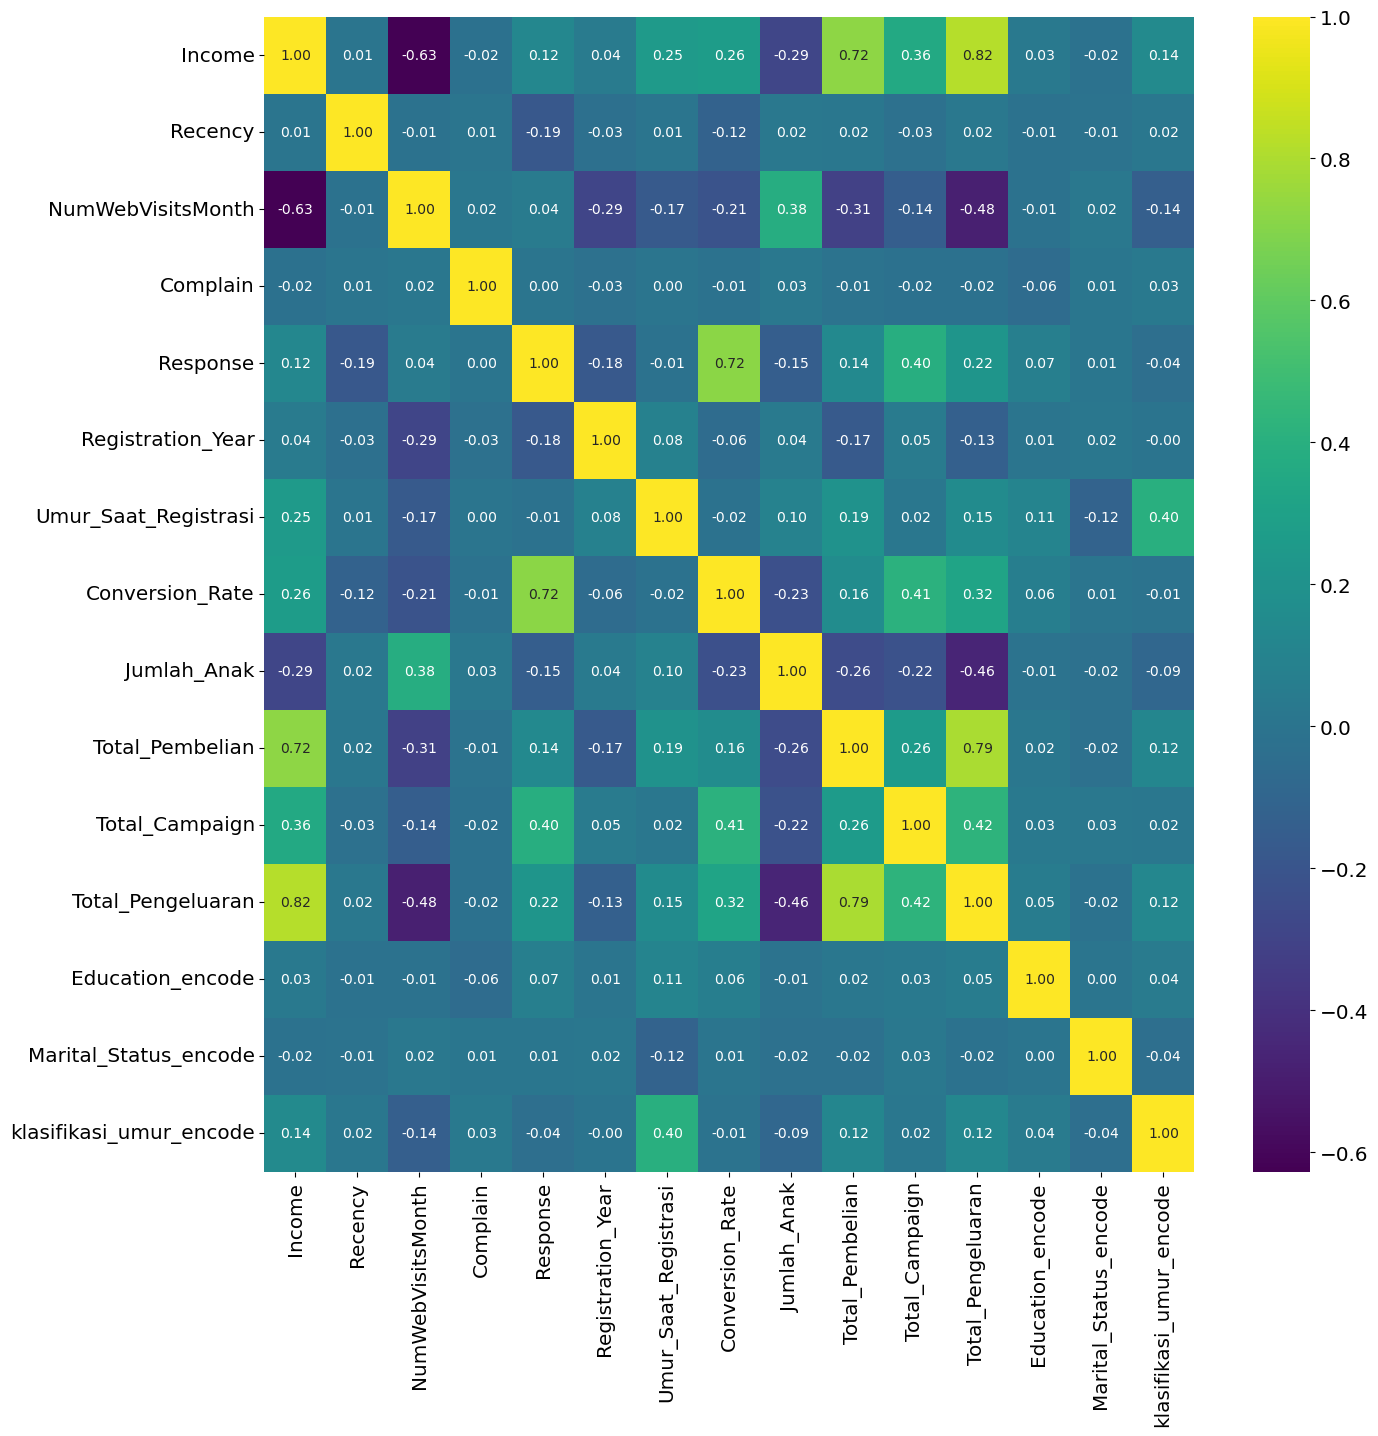

In [13]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt='.2f')

In [14]:
nums = ['Conversion_Rate', 'Total_Campaign', 'Total_Pengeluaran', 'Response']
nums_negatif = ['Recency', 'Registration_Year', 'Jumlah_Anak', 'Response']

<Axes: >

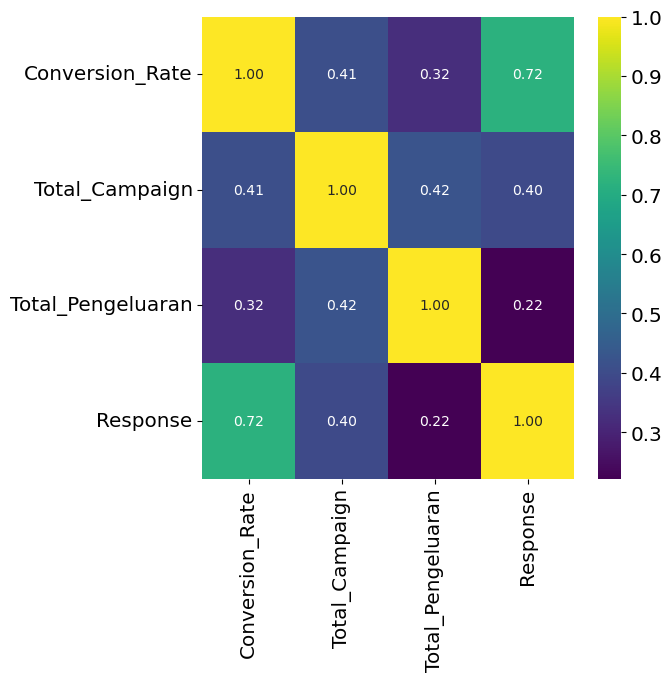

In [15]:
plt.figure(figsize=(6, 6))
sns.heatmap(df[nums].corr(), cmap='viridis', annot=True, fmt='.2f')

<Axes: >

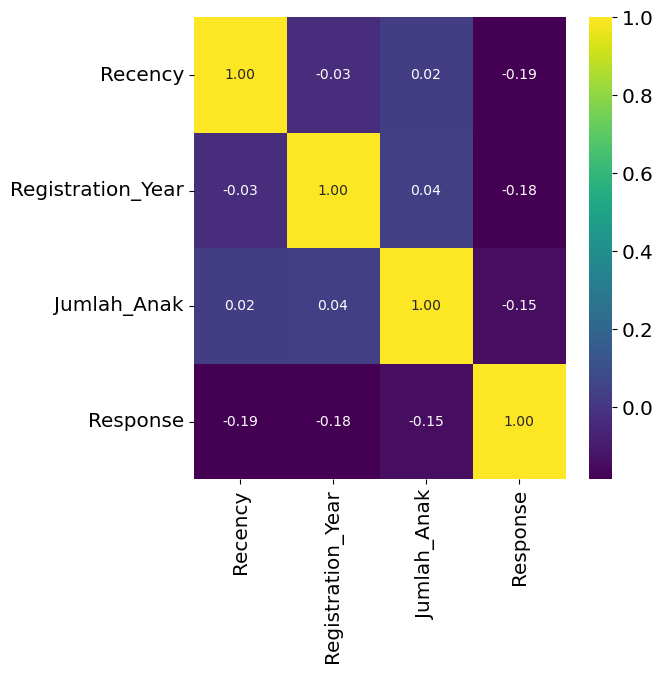

In [16]:
plt.figure(figsize=(6, 6))
sns.heatmap(df[nums_negatif].corr(), cmap='viridis', annot=True, fmt='.2f')

### VISUALISASI TOTAL CAMPAIGN

In [17]:
df.sample(2)

,Income,Recency,NumWebVisitsMonth,Complain,Response,Registration_Year,Umur_Saat_Registrasi,Conversion_Rate,Jumlah_Anak,Total_Pembelian,Total_Campaign,Total_Pengeluaran,Education_encode,Marital_Status_encode,klasifikasi_umur_encode
648,62882000.0,26,4,0,0,2012,43,0.0,1,20,0,1338000,1,0,0
1326,55759000.0,84,8,0,0,2012,50,0.0,1,26,0,854000,1,5,1


In [19]:
amount_response = df.groupby(['Total_Campaign', 'Response']).agg({'Income' : 'count'})
amount_response

Income
Total_Campaign Response        
0              0           1470
               1            123
1              0            183
               1             82
2              0             34
               1             30
3              0              4
               1             20
4              0              1
               1              6

In [21]:
df2 = amount_response.reset_index()
df2

,Total_Campaign,Response,Income
0,0,0,1470
1,0,1,123
2,1,0,183
3,1,1,82
4,2,0,34
5,2,1,30
6,3,0,4
7,3,1,20
8,4,0,1
9,4,1,6


In [26]:
df2 = df2.rename(columns={'Income': 'Penerimaan'})

In [27]:
df2_1 = df2[df2.Response == 1]

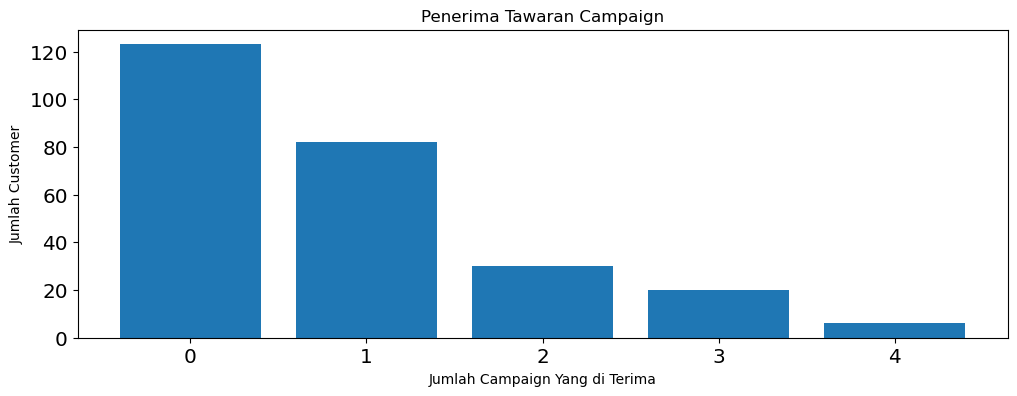

In [29]:
plt.bar(df2_1['Total_Campaign'], df2_1['Penerimaan'])

plt.title('Penerima Tawaran Campaign')
plt.xlabel('Jumlah Campaign Yang di Terima')
plt.ylabel('Jumlah Customer')

# plt.xticks(rotation=90)

plt.show()

### VISUALISASI RATA RATA CONVERSION RATE

In [34]:
amount_response2 = df.groupby(['Response']).agg({'Conversion_Rate' : 'mean'})
amount_response2

,Conversion_Rate
Response,
0,0.000000
1,0.256504


In [36]:
df3 = amount_response2.reset_index()

In [42]:
df3['Response'] = df3['Response'].replace({1: 'Di Terima', 0: 'Di Tolak'})

In [43]:
df3['Presentase_Avg_CR'] = df3['Conversion_Rate'] * 100

In [45]:
df3

,Response,Conversion_Rate,Presentase_Avg_CR
0,Di Tolak,0.000000,0.000000
1,Di Terima,0.256504,25.650429


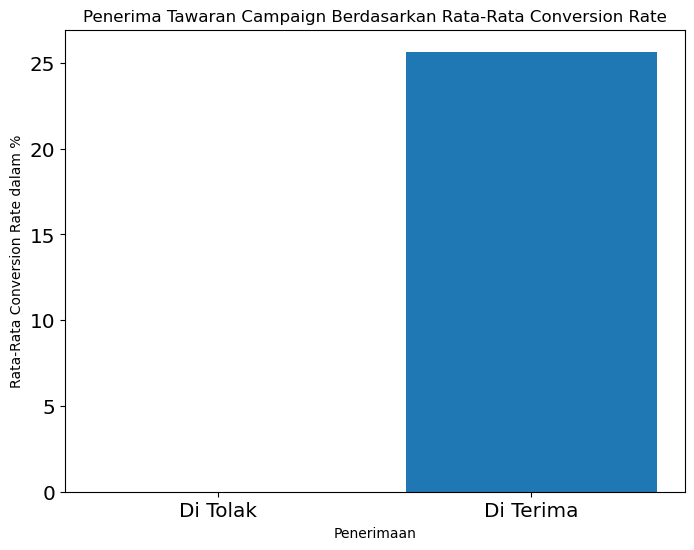

In [54]:
plt.figure(figsize=(8, 6))

plt.bar(df3['Response'], df3['Presentase_Avg_CR'])

plt.title('Penerima Tawaran Campaign Berdasarkan Rata-Rata Conversion Rate')
plt.xlabel('Penerimaan')
plt.ylabel('Rata-Rata Conversion Rate dalam %')

# plt.xticks(rotation=90)

plt.show()

### VISUALISASI RATA RATA PENGELUARAN

In [55]:
amount_response3 = df.groupby(['Response']).agg({'Total_Pengeluaran' : 'mean'})
amount_response3

,Total_Pengeluaran
Response,
0,463108.747045
1,815245.210728


In [57]:
df4 = amount_response3.reset_index()
df4

,Response,Total_Pengeluaran
0,0,463108.747045
1,1,815245.210728


In [59]:
df4['Response'] = df4['Response'].replace({1: 'Di Terima', 0: 'Di Tolak'})

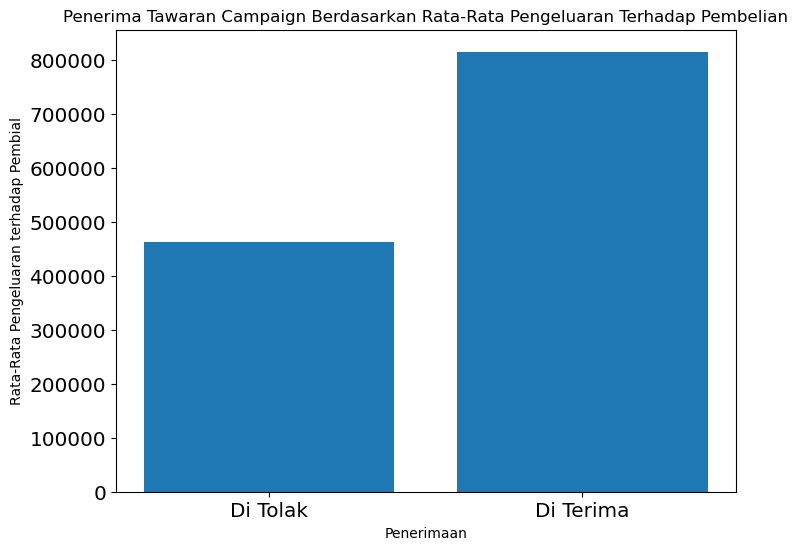

In [60]:
plt.figure(figsize=(8, 6))

plt.bar(df4['Response'], df4['Total_Pengeluaran'])

plt.title('Penerima Tawaran Campaign Berdasarkan Rata-Rata Pengeluaran Terhadap Pembelian')
plt.xlabel('Penerimaan')
plt.ylabel('Rata-Rata Pengeluaran terhadap Pembial')

# plt.xticks(rotation=90)

plt.show()